In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.animation as animation
#%matplotlib nbagg

In [32]:
TIME_W = 0.001
Fc = 500000
Tc = 1/Fc

t = np.linspace(0,TIME_W, Fc)
det = (np.max(t)-np.min(t))/Fc

tc = np.linspace(0,TIME_W,Fc*TIME_W)
detc = (np.max(tc)-np.min(tc))/(Fc*TIME_W)

f1 = 200000
x1 = np.sin(2*np.pi*f1*t)
x1c = np.sin(2*np.pi*f1*tc)

f2 = 300000
x2 = np.sin(2*np.pi*f2*t)
x2c = np.sin(2*np.pi*f2*tc)

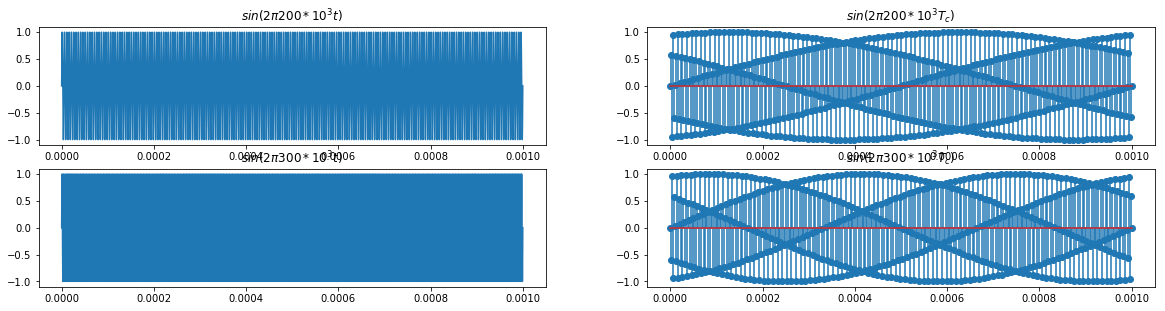

In [37]:
fig_1 = plt.figure(figsize=(20,10))
plt.subplot(4,2,1)
plt.title("$sin(2\pi{200*10^3}t)$");
plt.plot(t,x1)
plt.subplot(4,2,2)
plt.title("$sin(2\pi{200*10^3}T_c)$");
plt.stem(tc,x1c)
plt.subplot(4,2,3)
plt.title("$sin(2\pi{300*10^3}t)$");
plt.plot(t,x2)
plt.subplot(4,2,4)
plt.title("$sin(2\pi{300*10^3}T_c)$");
plt.stem(tc,x2c)
plt.show()

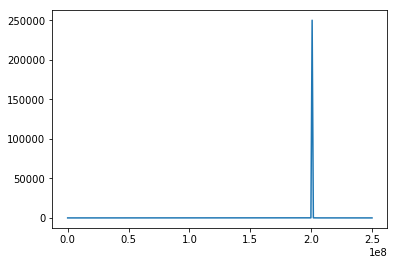

In [44]:
X1 = np.fft.fft(x1)
axf = np.linspace(0.0, 1.0//(2*det), 500//2)
plt.plot(axf,np.abs(X1[0:(500//2)]))
plt.show()

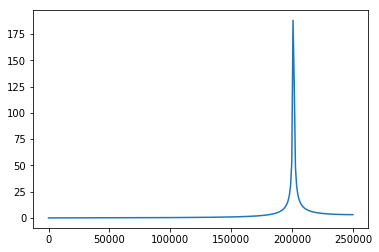

500.0

In [62]:
X1c = np.fft.fft(x1c)
axf = np.linspace(0.0, 1/(2*detc), int((TIME_W*Fc))//2)
plt.plot(axf,np.abs(X1c[0:(int((TIME_W*Fc))//2)]))
plt.show()

TIME_W*Fc

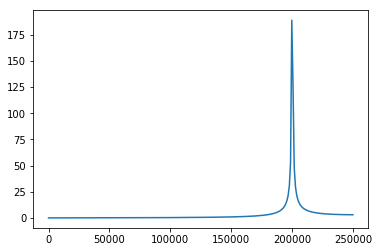

In [6]:
X2c = np.fft.fft(x2c)
axf = np.linspace(0.0, 1.0/(2*Tc), 500//2)
plt.plot(axf,np.abs(X2c[0:(500//2)]))
plt.show()

<h1>Tutta colpa del campionamento</h1>
<p>Il campionamento equivale a una convoluzione in frquenza con un pettine di delta alla frequenza di campionamento<p>

$x_c\left(t\right)=x\left(t\right)\delta_{T_C}\left(t\right)$

$X_c\left(f\right)=x\left(f\right)*F_C\delta_{F_C}\left(f\right)$

<p>Il risultato è una replica dello spettro del seganele originale intorno a tutti i multipli della frequenza di
campionamento<p>

<p>se il segnale è una sinusoide il modulo della trasformata presenta due delta una in $F_0$ e l'altra in $-F_0$</p>
<p>la convoluzine con un pettine di delta di periodo $F_C$ ritorna una delta in $F_C-F_0$ e una in $F_C+F_0$</p>
<p>Con due sinusoidi, una alla frequenza di 200KHz e una a 300KHz campionate alla frequnza di 500KHz si possono osservare i risultati spettrali(sopra grafici) </p>
<p>i due spettri sono uguali ma attenzione il primo grafico rappresen la componente spettrale della sinusoide a 200KHz, la seconda immagine ..... è la replica spettrale negativa diciamo 500000-300000</p>

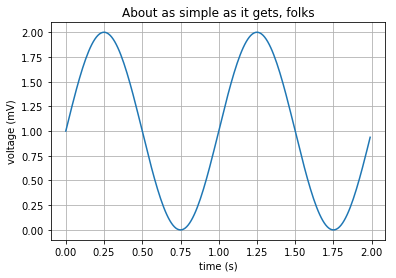

In [7]:
def mc_plot(t,s,xlabel='',ylabel='',title='',grid=False):
    t = np.arange(0.0, 2.0, 0.01)
    s = 1 + np.sin(2*np.pi*t)
    plt.plot(t, s)

    if xlabel is not '': plt.xlabel(xlabel)
    if ylabel is not '': plt.ylabel(ylabel)
    if title is not '': plt.title(title)
    plt.grid(grid)
    plt.show()
    
mc_plot(t,x1,'time (s)','voltage (mV)','About as simple as it gets, folks',True)